# Data process

In [5]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import sys
import os
from os.path import join
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Aqua.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


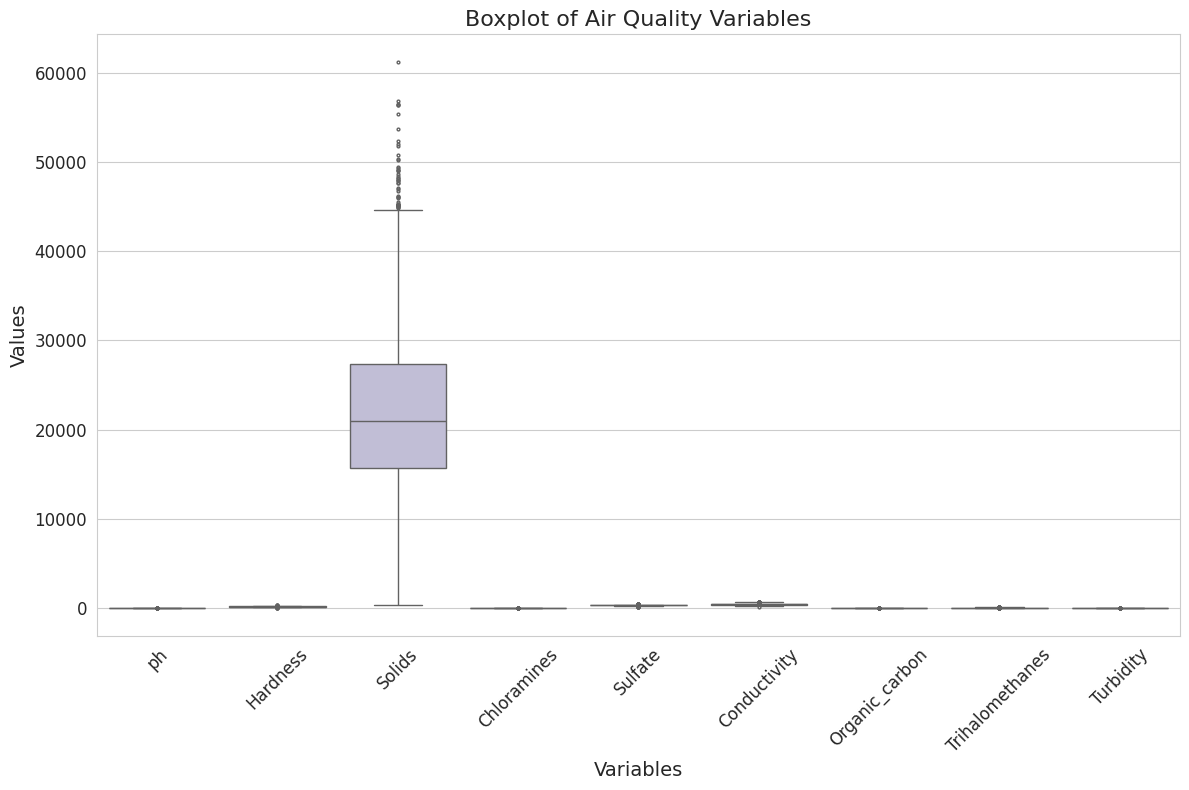

In [7]:
def Boxplot(df, exclude = ['Potability']): 
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df.drop(columns=exclude, errors='ignore'), palette="Set3", flierprops=dict(markersize=2))
    plt.title('Boxplot of Air Quality Variables', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=12)  # Set y-axis label font size
    plt.xlabel('Variables', fontsize=14)  # Set x-axis label font size
    plt.ylabel('Values', fontsize=14)  # Set y-axis label font size
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

Boxplot(df)

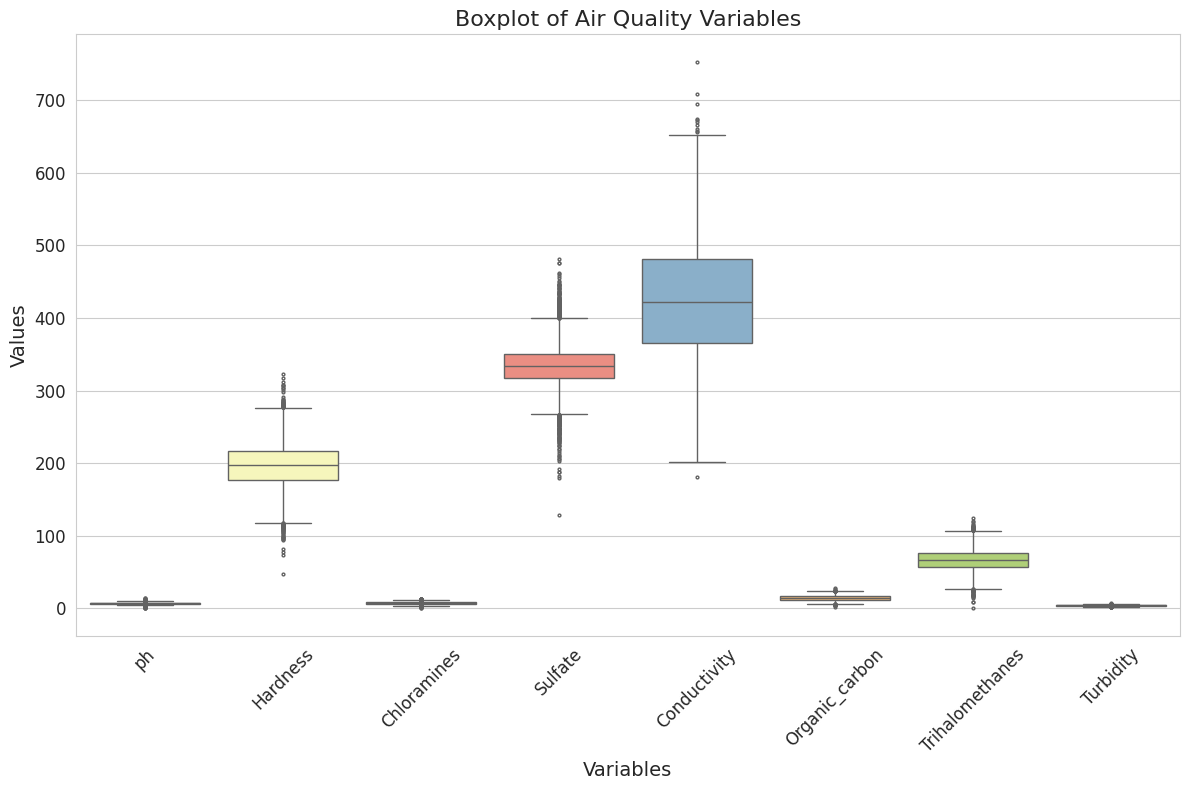

In [9]:
Boxplot(df, ['Solids', 'Potability'])

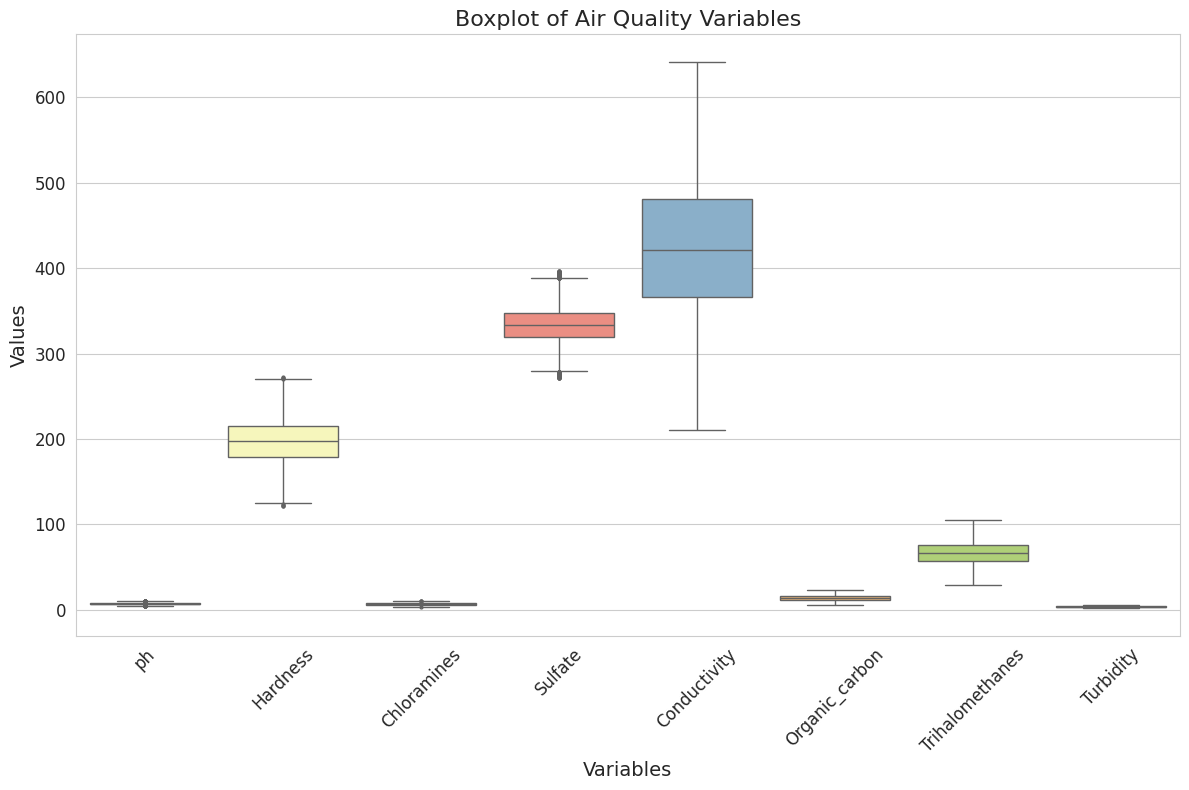

In [14]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

scale = 1.4
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR
cols = df.columns  # Look for outliers in columns starting from CO(GT)

lower_lim = lower_lim[cols]
upper_lim = upper_lim[cols]

condition = ~((df[cols] < lower_lim) | (df[cols] > upper_lim)).any(axis=1)

# Generate a new DataFrame with outliers removed
dataS = df[condition]
Boxplot(dataS, ['Potability', 'Solids'])

In [16]:
dataS.to_csv('Clean.csv')

# Images?

## for image_dataset_from_directory

In [32]:
font = ImageFont.truetype('../Master/JetBrainsMonoNerdFont-Regular.ttf', 16)
def textINimage(event:np.ndarray, size:int=224) -> Image.Image:
    img = Image.fromarray(np.zeros([size,size,3]), 'RGB')
    for i, f in enumerate(event):
        x = ((1/4)+(i%2))*size//2.
        y = (size//25)+((i//2)*2*size//len(event))
        ImageDraw.Draw(img).text((x , y), f'{f:.1f}', fill=(255,255,255), font=font)
    return img

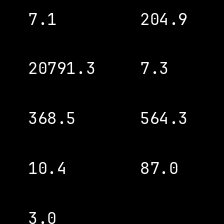

In [33]:
textINimage(df.drop('Potability', axis=1).values[0])

In [34]:
def save_image(event:np.ndarray, name:str, func, loc:str, size:int=224) -> None:
    func(event, size).save(join(loc,name))

In [47]:
def Generate(df:pd.DataFrame, func, path:str='imagesTML', size:int=224): 
    

    # Create the directory for the images
    for i in ['0', '1']:
        xd = join(path, i)
        os.makedirs(xd, exist_ok=True)

    train = df.drop('Potability', axis=1)
    target = df['Potability']
    index = df.index.values
    
    for j in index:
        # name = str(j) + "_" + str(target.loc[j]) + ".png
        name = "{:04d}".format(j) + ".png"
        dir_path = join(path, str(target.loc[j]))
        save_image(train.loc[j].values, name, func=func, loc=dir_path, size=size)

    print("Images created at:", path)

In [48]:
%%time
Generate(df, textINimage)

Images created at: imagesTML
CPU times: user 2min 10s, sys: 421 ms, total: 2min 10s
Wall time: 2min 11s


## for datasets load_dataset()

In [6]:
font = ImageFont.truetype('JetBrainsMonoNerdFont-Regular', 16)
def textINimage3x3(event:np.ndarray, size:int=224) -> Image.Image:
    img = Image.fromarray(np.zeros([size,size,3]), 'RGB')
    for i, f in enumerate(event):
        x = ((1/10)+(i%3))*size//3.3
        y = (size//10)+((i//3)*3*size//len(event))
        ImageDraw.Draw(img).text((x , y), f'{f:.1f}', fill=(255,255,255), font=font)
    return img
textINimage3x3(df.drop('Potability', axis=1).values[0])

OSError: cannot open resource

In [6]:
def save_image(event:np.ndarray, name:str, func, loc:str, size:int=224) -> None:
    func(event, size).save(join(loc,name))

In [8]:
def Generate(df:pd.DataFrame, func, path:str='imagesTML', size:int=224): 
    

    # Create the directory for the images
    for i in ['0', '1']:
        xd = join(path, i)
        os.makedirs(xd, exist_ok=True)

    train = df.drop('Potability', axis=1)
    target = df['Potability']
    index = df.index.values
    
    for j in index:
        # name = str(j) + "_" + str(target.loc[j]) + ".png
        name = "{:04d}".format(j) + ".png"
        dir_path = join(path, str(target.loc[j]))
        save_image(train.loc[j].values, name, func=func, loc=dir_path, size=size)

    print("Images created at:", path)

In [9]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [11]:
%%time
Generate(df_train, textINimage3x3, path='images/train')

Images created at: images/train
CPU times: user 47.3 s, sys: 390 ms, total: 47.7 s
Wall time: 48 s


In [12]:
%%time
Generate(df_test, textINimage3x3, path='images/test')

Images created at: images/test
CPU times: user 11.9 s, sys: 93.4 ms, total: 12 s
Wall time: 12 s


# Traaaaaaaain

In [72]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory as image_dataset 
import pathlib
import PIL
import matplotlib.pyplot as plt

In [51]:
batch_size = 8
img_size = 224
dataDir = 'imagesTML'
dataDir = pathlib.Path(dataDir).with_suffix('')

In [54]:
image_count = len(list(dataDir.glob('*/*.png')))
print(image_count)

3276


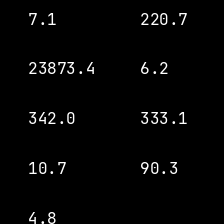

In [60]:
roses = list(dataDir.glob('0/*'))
PIL.Image.open(str(roses[99]))

In [62]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  dataDir,
  validation_split=0.2,
  subset="both",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)


Found 3276 files belonging to 2 classes.
Using 2621 files for training.
Using 655 files for validation.


In [63]:
class_names = train_ds.class_names
print(class_names)

['0', '1']


In [78]:
num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [80]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 56, 56, 64)       

In [81]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50
328/328 [==============================] - 74s 222ms/step - loss: 0.6725 - accuracy: 0.6078 - val_loss: 0.6700 - val_accuracy: 0.6092
Epoch 2/50
328/328 [==============================] - 98s 297ms/step - loss: 0.6703 - accuracy: 0.6101 - val_loss: 0.6694 - val_accuracy: 0.6092
Epoch 3/50
328/328 [==============================] - 89s 270ms/step - loss: 0.6698 - accuracy: 0.6101 - val_loss: 0.6691 - val_accuracy: 0.6092
Epoch 4/50
328/328 [==============================] - 104s 316ms/step - loss: 0.6696 - accuracy: 0.6101 - val_loss: 0.6691 - val_accuracy: 0.6092
Epoch 5/50
328/328 [==============================] - 104s 317ms/step - loss: 0.6695 - accuracy: 0.6101 - val_loss: 0.6691 - val_accuracy: 0.6092
Epoch 6/50
328/328 [==============================] - 102s 312ms/step - loss: 0.6696 - accuracy: 0.6101 - val_loss: 0.6694 - val_accuracy: 0.6092
Epoch 7/50
328/328 [==============================] - 99s 301ms/step - loss: 0.6693 - accuracy: 0.6101 - val_loss: 0.6692 - val

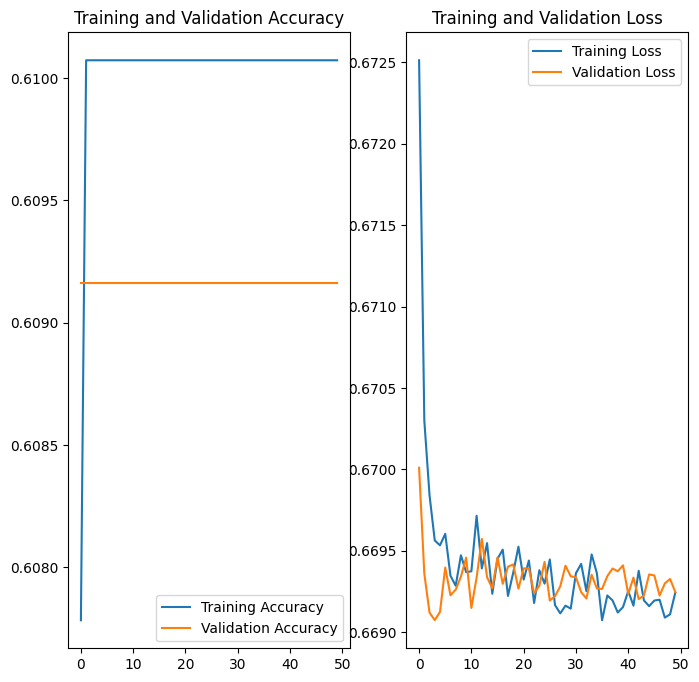

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [83]:
history.history['accuracy']

[0.607783317565918,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.6100724935531616,
 0.61007249355